In [11]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('Taxi-v2')
episodeCount = 2000
stepCount = 5000
gamma = 0.9
epsilon = 0.1
alpha = 0.6

In [12]:
def sarsa(env, alpha, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    for episode in range(episodeCount):
        state = env.reset()
        start = state
        rewardOfEpisode = 0
        if np.random.rand(1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])
        for step in range(stepCount):
            stateNew, reward, done, info = env.step(action)
            if np.random.rand(1) < epsilon:
                actionNew = env.action_space.sample()
            else:
                actionNew = np.argmax(Q[stateNew])
            rewardOfEpisode += reward
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * reward\
            + gamma * alpha * Q[stateNew, actionNew]
            state = stateNew
            action = actionNew
            if done:
                break
        rewards.append(rewardOfEpisode)
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward of an episode')
    plt.show()

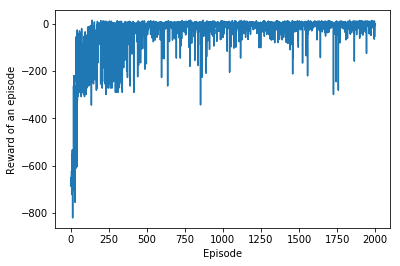

In [13]:
sarsa(env, alpha, epsilon)

In [14]:
def qLearning(env, alpha, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []
    for episode in range(episodeCount):
        state = env.reset()
        start = state
        rewardOfEpisode = 0
        for step in range(stepCount):
            if np.random.rand(1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state])
            stateNew, reward, done, info = env.step(action)
            rewardOfEpisode += reward
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * reward + gamma * alpha * max(Q[stateNew])
            state = stateNew
            if done:
                break
        rewards.append(rewardOfEpisode)
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward of an episode')
    plt.show()

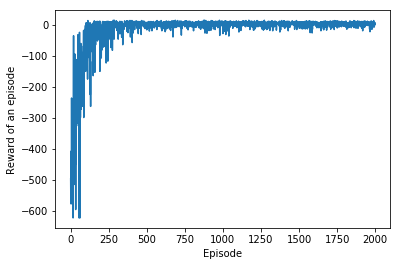

In [15]:
qLearning(env, alpha, epsilon)